In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('train.csv')

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df=df.dropna(subset=['Embarked'])

In [18]:
pd.get_dummies(df,columns=['Embarked'],drop_first=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0,0


In [19]:
def mr(name):
    if 'Mrs' in name:
        return 'Mrs'
    elif 'Mr' in name:
        return 'Mr'
    else:
        return "Miss"

In [20]:
df['Name'].apply(mr).isnull().sum()

0

In [21]:
df['fName']=df['Name'].apply(mr)

In [22]:
df.drop('Name',inplace=True,axis=1)

In [23]:
df.drop('Ticket',axis=1,inplace=True)

In [24]:
df.drop('Cabin',axis=1,inplace=True)

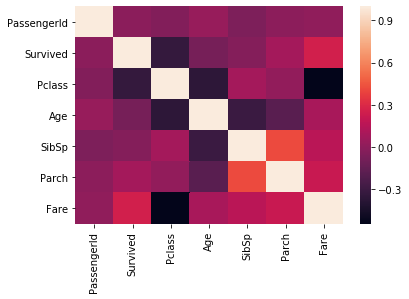

In [25]:
sns.heatmap(df.corr())

29.64209269662921

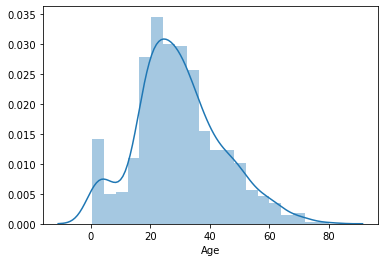

In [26]:
sns.distplot(df['Age'].dropna())
df['Age'].mean()

In [27]:
def ageRange(age):
    if age<10:
        return '<10'
    elif age<20:
        return '10-20'
    elif age<30:
        return '20-30'
    elif age<40:
        return '30-40'
    elif age<50:
        return '40-50'
    elif age<60:
        return '50-60'
    elif age<70:
        return '60-70'
    elif age<80:
        return '70-80'
    else:
        return 'Null'

In [28]:
df['range']=df['Age'].apply(ageRange)

In [29]:
df[['range','Age']]

,range,Age
0,20-30,22.0
1,30-40,38.0
2,20-30,26.0
3,30-40,35.0
4,30-40,35.0
...,...,...
886,20-30,27.0
887,10-20,19.0
888,Null,NaN
889,20-30,26.0


In [30]:
df.drop('Age',inplace=True,axis=1)

In [31]:
df=pd.get_dummies(df,drop_first=True)

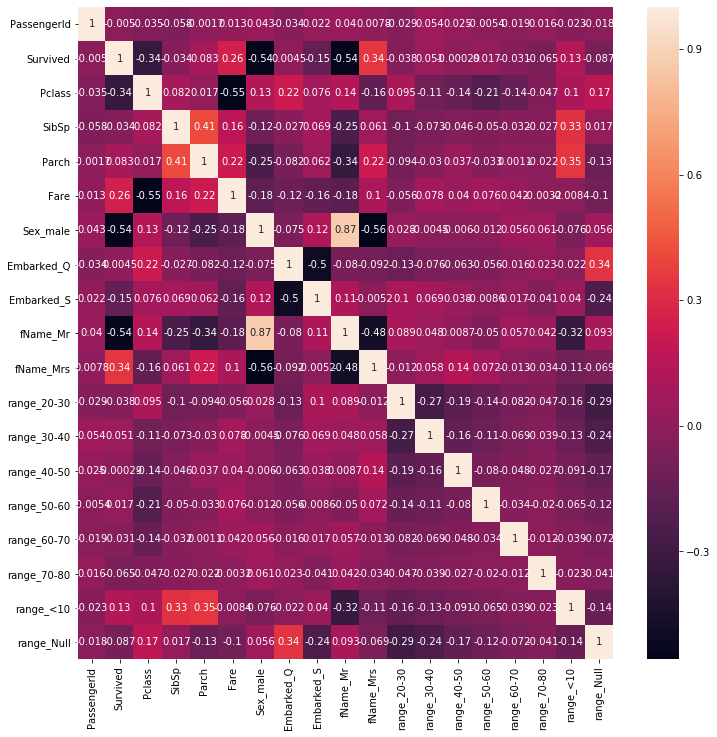

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()

In [34]:
X=df.drop(['PassengerId','Survived'],axis=1).values
y=df['Survived'].values

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
model= LogisticRegression()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)

In [37]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
predictions = model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



# Test Data

In [108]:
df2=pd.read_csv('test.csv')

In [142]:
len(df2)

418

In [110]:
df2.drop('Cabin',axis=1,inplace=True)

In [113]:
df2['Fare']=df2['Fare'].fillna(df2['Fare'].mean())

In [117]:
df2['range']=df2['Age'].apply(ageRange)

In [120]:
df2['fName']=df2['Name'].apply(mr)

In [124]:
df2.drop(['Name','Age','Ticket'],inplace=True,axis=1)

In [150]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'fName_Mr', 'fName_Mrs',
       'range_20-30', 'range_30-40', 'range_40-50', 'range_50-60',
       'range_60-70', 'range_70-80', 'range_<10', 'range_Null'],
      dtype='object')

In [153]:
df2 = df2[['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'fName_Mr', 'fName_Mrs',
       'range_20-30', 'range_30-40', 'range_40-50', 'range_50-60',
       'range_60-70', 'range_70-80', 'range_<10', 'range_Null']]
df2.columns

Index(['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'fName_Mr', 'fName_Mrs', 'range_20-30',
       'range_30-40', 'range_40-50', 'range_50-60', 'range_60-70',
       'range_70-80', 'range_<10', 'range_Null'],
      dtype='object')

In [129]:
df2=pd.get_dummies(df2,columns=['Embarked','Sex','range','fName'],drop_first=True)

In [154]:
model=LogisticRegression()
model.fit(df.drop(['PassengerId','Survived'],axis=1).values,
df['Survived'].values)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
results=model.predict(df2.drop('PassengerId',axis=1))

In [156]:
results = pd.DataFrame(results)
results.columns =['Survived']

In [157]:
survived=pd.concat([df2,results],axis=1)

In [158]:
survived[['PassengerId','Survived']].to_csv("result5.csv",index=None)

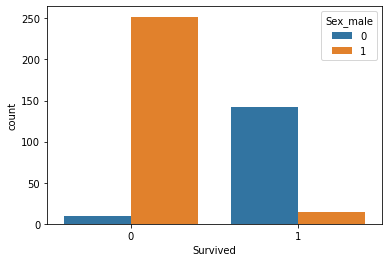

In [160]:
sns.countplot(survived['Survived'],hue=survived['Sex_male'])

# Tensorflow?

In [61]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

Early_stop = EarlyStopping(patience=10,mode='min')
X_train.shape

(622, 17)

In [62]:
model=Sequential()

#Input layer
model.add(Dense(17,activation='relu'))
model.add(Dropout(0.3))

#Hidden Layer
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(4,activation='relu'))
model.add(Dropout(0.3))


#Output Layer
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [63]:
model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),batch_size=20,callbacks=[Early_stop],verbose=1)

Train on 622 samples, validate on 267 samples
Epoch 1/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.2694 - val_loss: 0.2456
Epoch 2/200
622/622 [==============================] - 0s 144us/sample - loss: 0.2571 - val_loss: 0.2467
Epoch 3/200
622/622 [==============================] - 0s 140us/sample - loss: 0.2460 - val_loss: 0.2453
Epoch 4/200
622/622 [==============================] - 0s 141us/sample - loss: 0.2455 - val_loss: 0.2442
Epoch 5/200
622/622 [==============================] - 0s 131us/sample - loss: 0.2454 - val_loss: 0.2428
Epoch 6/200
622/622 [==============================] - 0s 136us/sample - loss: 0.2421 - val_loss: 0.2413
Epoch 7/200
622/622 [==============================] - 0s 137us/sample - loss: 0.2385 - val_loss: 0.2403
Epoch 8/200
622/622 [==============================] - 0s 129us/sample - loss: 0.2376 - val_loss: 0.2392
Epoch 9/200
622/622 [==============================] - 0s 133us/sample - loss: 0.2421 - val_loss: 0.2388
Epoch 10/20

In [ ]:
#model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),batch_size=20,callbacks=[Early_stop])
model.fit(x=df.drop(['PassengerId','Survived'],axis=1).values,
y=df['Survived'].values,epochs=200,batch_size=20,callbacks=[Early_stop])

In [64]:
model_loss = pd.DataFrame(model.history.history)

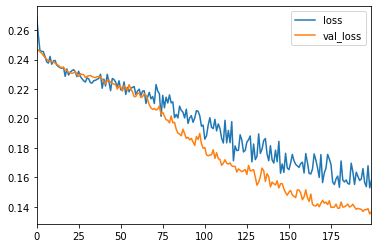

In [65]:
model_loss.plot()

In [66]:
predictions=model.predict_classes(X_test)
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [262]:
results=model.predict_classes(df2.drop('PassengerId',axis=1).values)
results=pd.DataFrame(results)
results.columns=['Survived']

In [263]:
survived=pd.concat([df2,results],axis=1)

In [264]:
survived[['PassengerId','Survived']].to_csv("result6.csv",index=None)

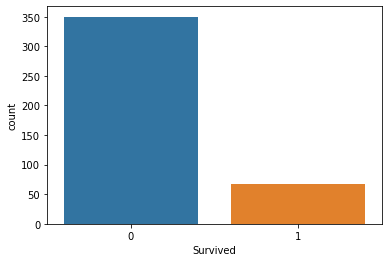

In [265]:
sns.countplot(survived['Survived'])

In [259]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'fName_Mr', 'fName_Mrs',
       'range_20-30', 'range_30-40', 'range_40-50', 'range_50-60',
       'range_60-70', 'range_70-80', 'range_<10', 'range_Null'],
      dtype='object')

In [261]:
df2 = df2[['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'fName_Mr', 'fName_Mrs',
       'range_20-30', 'range_30-40', 'range_40-50', 'range_50-60',
       'range_60-70', 'range_70-80', 'range_<10', 'range_Null']]
df2.columns

Index(['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'fName_Mr', 'fName_Mrs', 'range_20-30',
       'range_30-40', 'range_40-50', 'range_50-60', 'range_60-70',
       'range_70-80', 'range_<10', 'range_Null'],
      dtype='object')

In [260]:
df2.columns

Index(['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'fName_Mr', 'fName_Mrs', 'range_20-30',
       'range_30-40', 'range_40-50', 'range_50-60', 'range_60-70',
       'range_70-80', 'range_<10', 'range_Null'],
      dtype='object')